In [1]:
from shifter import *

In [2]:
def show(elements,transpose=False,big=False):
    if big:
        plt.figure(figsize=(10,20))
    else:
        plt.figure()
    if transpose:
        plt.imshow(elements.transpose())
    else:
        plt.imshow(elements)
    #plt.colorbar()
    plt.grid(b=None)
    plt.show(block=False)

In [3]:
#W = shifter_train(num_samples=20,sweeps=9000)

In [4]:
W = np.load('conn1.npy')

In [7]:
def test_VLN(VLN):
    print('VLN: ', str(VLN))
    V1, V2, V3, Vt, _,_,_,_ = combine_shifter_PCRN(W, VLN=VLN,verbose=False)
    #show(W_extended)
    show(Vt, transpose=True,big=True)
    
    plt.figure(figsize=(10,3))
    window=5
    plt.plot(np.convolve(np.sum(Vt[:,51:151],axis=1), np.ones(window)/window))
    plt.plot(np.convolve(np.sum(Vt[:,151:251],axis=1), np.ones(window)/window))
    plt.plot(np.convolve(np.sum(Vt[:,251:351],axis=1), np.ones(window)/window))
    plt.plot(np.convolve(np.sum(Vt[:,351:],axis=1), np.ones(window)/window))
    plt.show()
    
    plt.figure(figsize=(8,5))
    
    tot = {str(i+1): np.sum(Vt[:,(51+i*100):(151+i*100)])/1000 for i in range(3)}
    tot['inhi'] = np.sum(Vt[:,351:])/1000
    plt.bar(tot.keys(),tot.values())
    plt.title('Mean activation per subpopulation')
    plt.show()
    
    print(V3[-1])
    print(20*'-')

VLN:  0.001


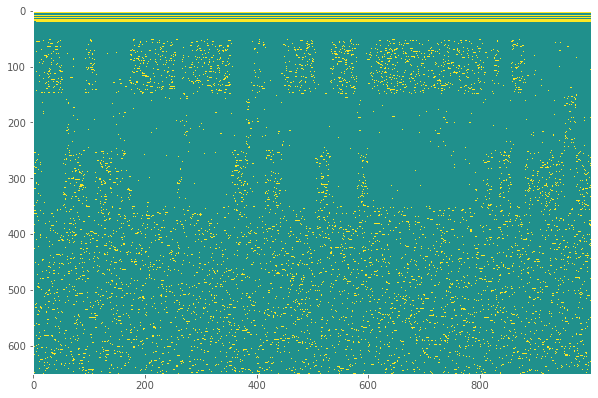

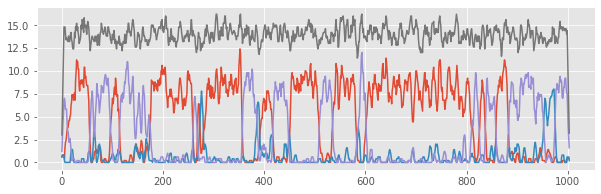

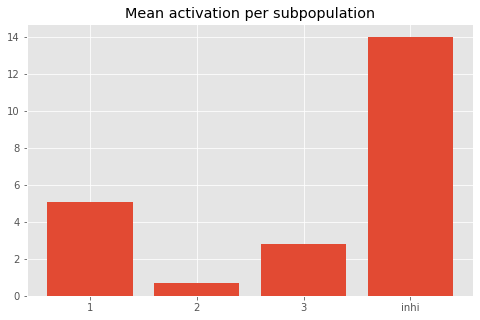

[1. 0. 0.]
--------------------
VLN:  0.002


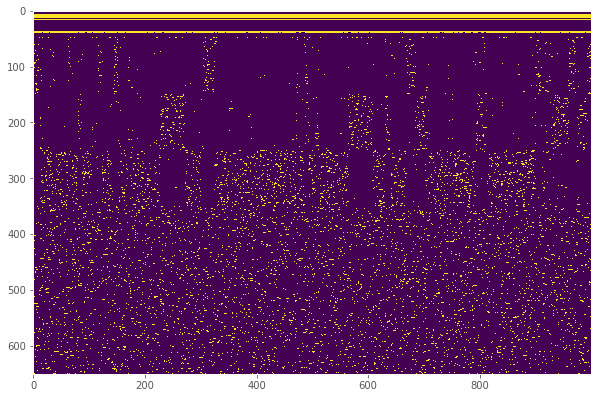

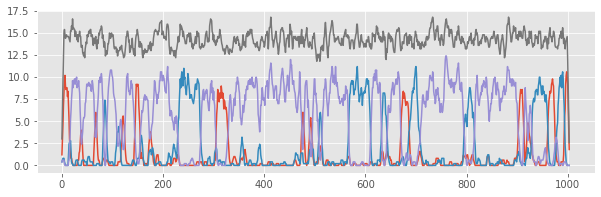

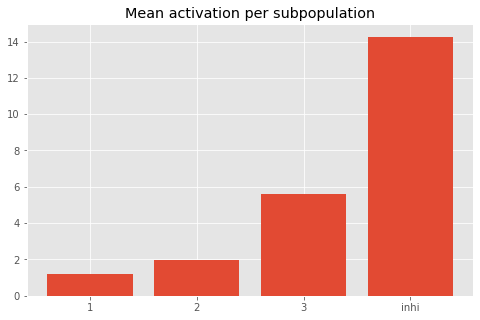

[0. 0. 1.]
--------------------
VLN:  0.005


KeyboardInterrupt: 

In [8]:
for i in [0.001,0.002,0.005,0.01,0.1,1.0,10.0]: # [0.001,0.002,0.005,0.01,0.1,1.0,10.0]
    test_VLN(i)

In [36]:
log_mean = {}

def means_VLN(VLN):
    print('VLN: ', str(VLN))
    V1, V2, V3, Vt, pred, W_extended = combine_shifter_PCRN(W, VLN=VLN,verbose=False)
    #show(W_extended)

    tot = {str(i+1): np.sum(Vt[:,(51+i*100):(151+i*100)])/1000 for i in range(3)}

    log_mean[VLN] = max(tot.values())
    
    print(V3[-1])
    print(tot.values())
    print(20*'-')

for i in np.linspace(0.01,10,num=30):
    means_VLN(i)

VLN:  0.01
[1. 0. 0.]
dict_values([10.046, 0.022, 0.029])
--------------------
VLN:  0.3544827586206897
[1. 0. 0.]
dict_values([4.208, 0.032, 16.437])
--------------------
VLN:  0.6989655172413793
[0. 0. 1.]
dict_values([0.0, 0.061, 56.967])
--------------------
VLN:  1.0434482758620691
[0. 0. 1.]
dict_values([0.0, 0.017, 65.796])
--------------------
VLN:  1.3879310344827587
[0. 1. 0.]
dict_values([12.876, 1.38, 0.014])
--------------------
VLN:  1.7324137931034482
[0. 1. 0.]
dict_values([0.0, 99.919, 0.007])
--------------------
VLN:  2.076896551724138
[0. 1. 0.]
dict_values([0.0, 97.418, 0.0])
--------------------
VLN:  2.4213793103448276
[0. 0. 1.]
dict_values([0.145, 0.0, 98.727])
--------------------
VLN:  2.765862068965517
[0. 0. 1.]
dict_values([0.0, 0.107, 99.712])
--------------------
VLN:  3.1103448275862067
[1. 0. 0.]
dict_values([99.941, 0.0, 0.0])
--------------------
VLN:  3.4548275862068962
[0. 0. 1.]
dict_values([0.0, 0.0, 99.877])
--------------------
VLN:  3.79931034

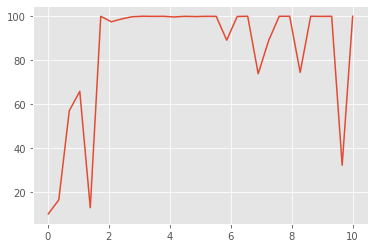

In [37]:
lists = sorted(log_mean.items())
x,y = zip(*lists)
plt.plot(x,y)
plt.show()

VLN:  0.001


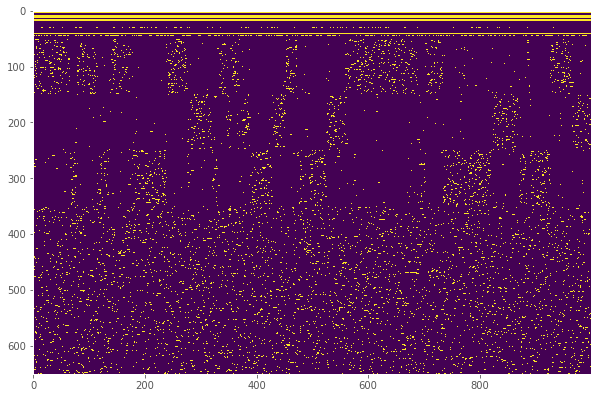

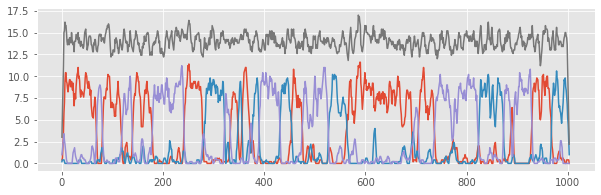

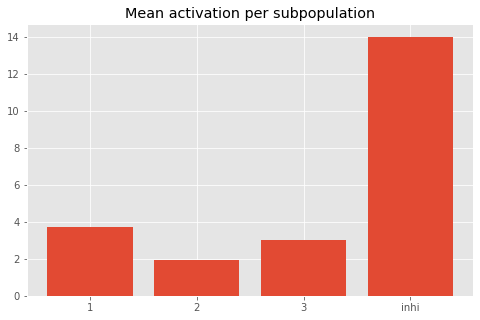

[1. 0. 0.]
----------


In [38]:
test_VLN(0.001)

VLN:  0.001


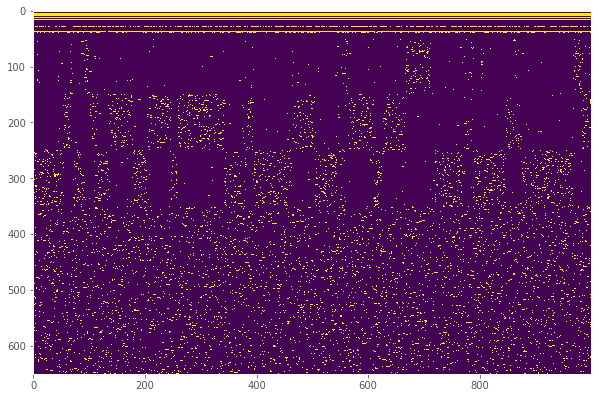

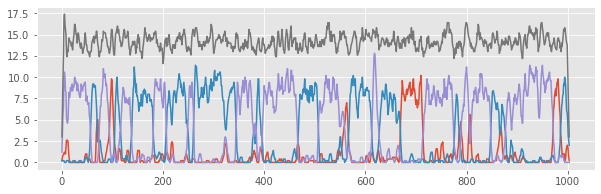

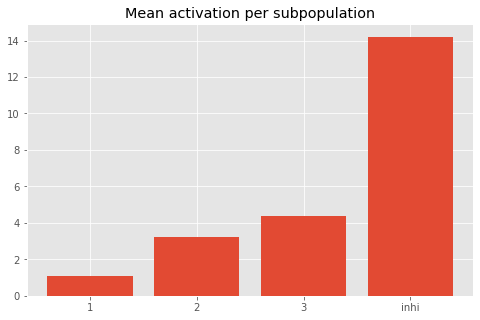

[0. 0. 1.]
----------


In [42]:
test_VLN(0.001)